In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
# dropout and flatten layers
from keras.layers import Dropout
from keras.layers import Flatten
# convolution for 2D image
from keras.layers.convolutional import Conv2D
# Max pooling
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model

In [ ]:
# permanent random seeding
np.random.seed(0)

In [ ]:
# import our data which are image pixels for
  # train data
  # test data set
#60000 images loaded, each image size : 28x28 pixels
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# data load control : to be sure that the expected data is correct  
# debugging method for complex models
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

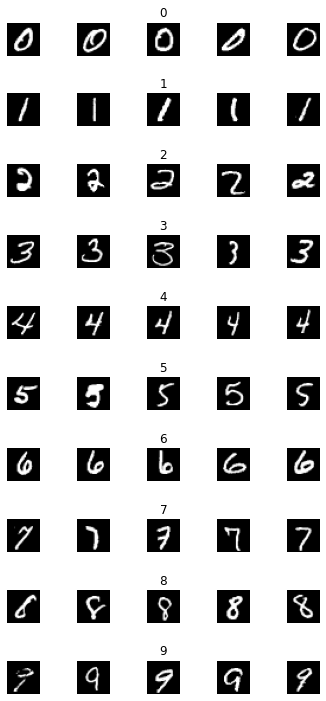

In [ ]:
# image recorder 10 classes
num_of_samples=[]

# create grid of digit
cols = 5
num_classes = 10

# plot figure layout 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


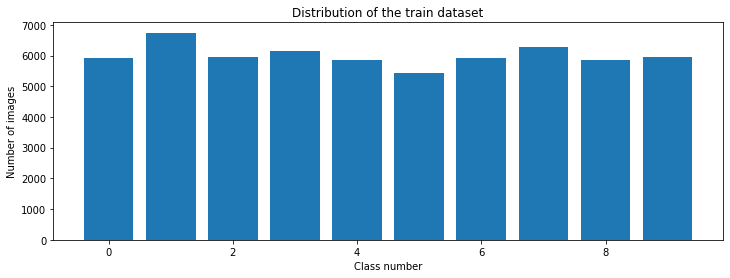

In [ ]:
# print the number of the image per class
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
# input
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# categorised labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# image normalizalition 
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the leNet model function
def leNet_model():
  # create linear model
  model = Sequential()
  """
  Conv2D(30, (5, 5), input_shape(), activation,stride=, padding=)
  - 30 : numbers of filters 
  - (5, 5) : filter matrix 5x5 => 30 x 25 = 750 + 30 (bias) = 780 Layers
  - input_shape() : image 28x28 = 784 input
  - activation : ReLU
  - strides : le kernel matrix => feature map// result from 1 stride 3x3 => stride of 2x2 : defaut
  - padding : preserve the spatial size of the image : default
  """
  # 1 conv layer
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  # 1 layer for pooling MAX matrix
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # 2 conv layer
  model.add(Conv2D(15, (3, 3), activation='relu'))
  # 2 pooling layer
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # adding flatten to simplify the dataset to a single dimension matrix
  model.add(Flatten())
  # 500 nodes : high nodes for more accuracy 
  model.add(Dense(500, activation='relu'))
  # dropout : turn off some nodes while others nodes are on to increase accuracy
  # but in the test data neurons off and on : starting efficiently together after learning process
  model.add(Dropout(0.5))
  # output layer
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [ ]:
# Training 
# 10% of data is reserved for validation test 
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)


Epoch 1/10
135/135 [==============================] - 34s 10ms/step - loss: 0.5507 - accuracy: 0.8227 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0283 - val_accuracy: 0.9918
Epoc

Text(0.5, 0, 'epoch')

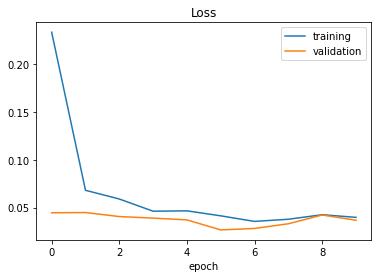

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

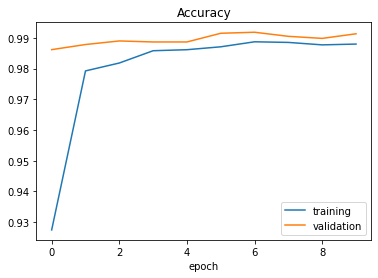

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])
 

Test score: 0.03566022962331772
Test accuracy: 0.9896000027656555


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


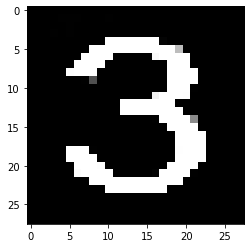

In [ ]:
# TESTING CNN

#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
# reshape to a one dimension array
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
# model prediction
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


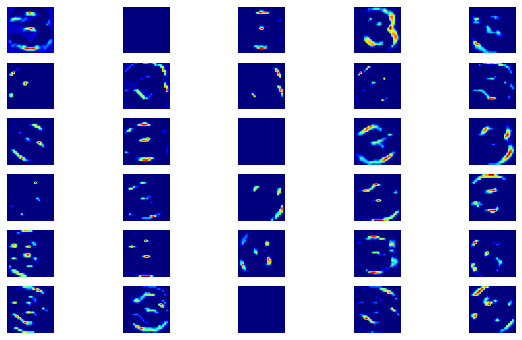

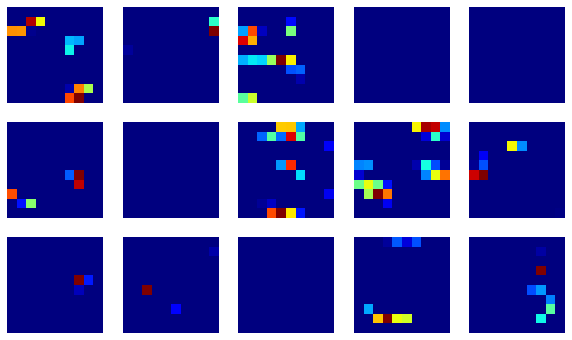

In [ ]:
# input and output of conv layers 1 
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
# input and output of conv layers 2
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')